In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
x=dataset.iloc[:,3:13]
y=dataset['Exited']

In [5]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
#encoding
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [7]:
x=x.drop(['Geography','Gender'],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [8]:
x=pd.concat([x,geography,gender],axis=1)

In [9]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
#splitting dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [12]:
# Creating ANN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [13]:
#from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout #to reduce overfitting

In [14]:
model=Sequential()
#adding the input layer
model.add(Dense(units=(11),activation='relu'))


In [15]:
#adding first hidden layer
model.add(Dense(units=7,activation='relu'))


In [16]:
#adding second hidden layer
model.add(Dense(units=7,activation='relu'))

In [17]:
##adding output layer
model.add(Dense(1,activation='sigmoid'))

In [18]:
#compliling
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
#specifying learning rate and use instead adam optimizer
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)


In [23]:
#early stoping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [27]:
model_history=model.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 989us/step - loss: 0.3852 - accuracy: 0.8397 - val_loss: 0.3816 - val_accuracy: 0.8455
Epoch 2/1000
536/536 [==============================] - 1s 949us/step - loss: 0.3565 - accuracy: 0.8522 - val_loss: 0.3678 - val_accuracy: 0.8482
Epoch 3/1000
536/536 [==============================] - 1s 969us/step - loss: 0.3448 - accuracy: 0.8589 - val_loss: 0.3624 - val_accuracy: 0.8550
Epoch 4/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3392 - accuracy: 0.8580 - val_loss: 0.3637 - val_accuracy: 0.8497
Epoch 5/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3369 - accuracy: 0.8580 - val_loss: 0.3605 - val_accuracy: 0.8523
Epoch 6/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3350 - accuracy: 0.8612 - val_loss: 0.3578 - val_accuracy: 0.8580
Epoch 7/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3335 - accuracy: 0.8600 - val_loss: 0.3594 - val_acc

536/536 [==============================] - 1s 926us/step - loss: 0.3180 - accuracy: 0.8658 - val_loss: 0.3555 - val_accuracy: 0.8561
Epoch 58/1000
536/536 [==============================] - 1s 918us/step - loss: 0.3164 - accuracy: 0.8666 - val_loss: 0.3565 - val_accuracy: 0.8550
Epoch 59/1000
536/536 [==============================] - 1s 983us/step - loss: 0.3171 - accuracy: 0.8673 - val_loss: 0.3538 - val_accuracy: 0.8569
Epoch 60/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3176 - accuracy: 0.8660 - val_loss: 0.3538 - val_accuracy: 0.8550
Epoch 61/1000
536/536 [==============================] - 1s 951us/step - loss: 0.3170 - accuracy: 0.8688 - val_loss: 0.3554 - val_accuracy: 0.8557
Epoch 61: early stopping


In [20]:
#model.fit(x_train,y_train,validation_split=0.33,batch_size=100,epochs=10)

Epoch 1/10
54/54 [==============================] - 3s 4ms/step - loss: 0.8081 - accuracy: 0.3392 - val_loss: 0.7245 - val_accuracy: 0.5195
Epoch 2/10
54/54 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.6604 - val_loss: 0.6716 - val_accuracy: 0.7501
Epoch 3/10
54/54 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.7824 - val_loss: 0.6515 - val_accuracy: 0.7955
Epoch 4/10
54/54 [==============================] - 0s 1ms/step - loss: 0.6334 - accuracy: 0.7975 - val_loss: 0.6038 - val_accuracy: 0.7967
Epoch 5/10
54/54 [==============================] - 0s 1ms/step - loss: 0.5629 - accuracy: 0.7964 - val_loss: 0.5223 - val_accuracy: 0.7955
Epoch 6/10
54/54 [==============================] - 0s 1ms/step - loss: 0.5010 - accuracy: 0.7962 - val_loss: 0.4805 - val_accuracy: 0.7955
Epoch 7/10
54/54 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.7962 - val_loss: 0.4550 - val_accuracy: 0.7955
Epoch 8/10
54/54 [==

In [29]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

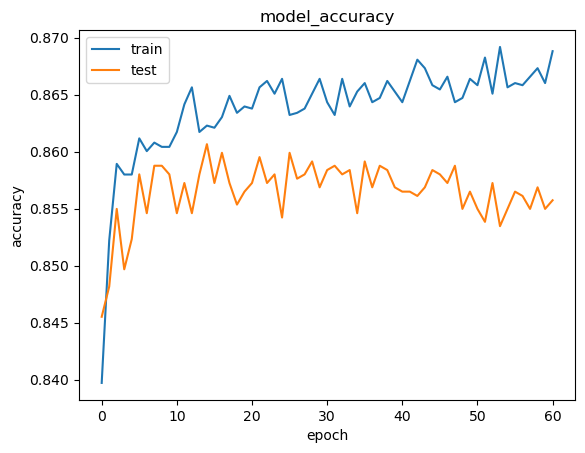

In [31]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

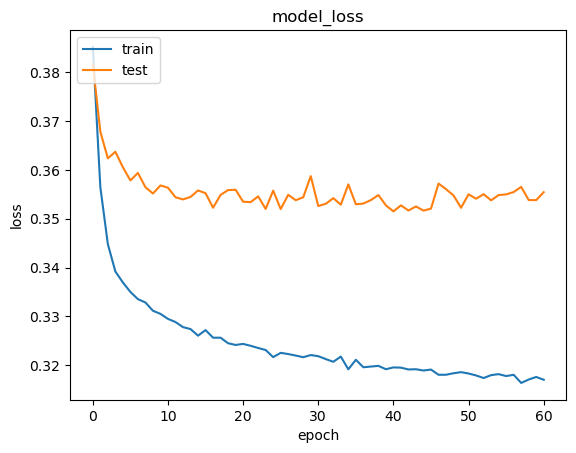

In [32]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [33]:
#making the predictions and evaluating the model
#predicting the test set results
y_pred=model.predict(x_test)
y_pred=(y_pred >=0.5)

63/63 [==============================] - 2s 791us/step


In [35]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1528,   67],
       [ 213,  192]], dtype=int64)

In [36]:
#calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.86

In [37]:
#get the weights
model.get_weights()

[array([[ 0.26215255, -0.54597574, -0.20987245,  0.3142358 , -0.23438215,
         -0.31267387,  0.35171497,  0.45121938, -0.5052802 ,  0.14047955,
         -0.04005831],
        [ 0.44456658, -0.07659702,  0.1347442 ,  0.3496055 ,  0.88579184,
          0.10326561, -0.50986254, -0.04749686,  1.0075204 ,  0.8021576 ,
         -0.2643768 ],
        [-0.22881484, -0.13683853, -0.30685082,  0.24091218, -0.10203014,
         -0.10235381,  0.141729  , -0.14799884,  0.0910233 , -0.0077603 ,
          0.11884172],
        [ 0.08878779, -0.28242376,  0.21186605,  0.32937783, -0.46416986,
         -0.7077017 , -0.1082149 ,  0.3130893 , -0.5998297 ,  0.29121044,
         -0.19514343],
        [ 0.13935776,  0.09020951,  0.9232208 ,  0.9919422 , -0.45356277,
         -0.6523135 ,  0.17603178, -0.3719398 ,  0.7347027 , -0.6076837 ,
          0.34761798],
        [-0.0873107 , -0.08110663, -0.22251432,  0.12621388, -0.05448319,
          0.13170032, -0.0367271 ,  0.08107373,  0.17665677, -0.2266469